In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
plt.rcParams['figure.figsize'] = (20, 15)

measures='../data/raw/measures/'
measures_processed='../data/processed/measures/'

First of all we are going to read all the files and put them in one csv

In [3]:
import glob
measure_files = glob.glob(measures+"*")
dfs = []
for measure_file in measure_files:
    if '.json' in measure_file:
        df = pd.read_json(measure_file, lines=True)
    else:
        df = pd.read_csv(measure_file)
    dfs.append(df)

In [4]:
for df in dfs:
    print(df.columns)

Index(['sensor', 'time', 'value'], dtype='object')
Index(['sensor', 'value', 'time'], dtype='object')
Index(['sensor', 'value', 'time'], dtype='object')
Index(['sensor', 'value', 'time'], dtype='object')
Index(['sensor', 'time', 'value'], dtype='object')
Index(['sensor', 'value', 'time'], dtype='object')
Index(['sensor', 'value', 'time'], dtype='object')
Index(['sensor', 'value', 'time'], dtype='object')
Index(['sensor', 'time', 'value'], dtype='object')
Index(['sensor', 'time', 'value'], dtype='object')


In [5]:
df = pd.concat(dfs, ignore_index=False, sort=True)
df.to_csv(measures_processed+'measures.csv')

In [30]:
df = pd.read_csv(measures_processed+'measures.csv')
del df['Unnamed: 0']

In [31]:
df.head()

,sensor,time,value
0,H-DHT11,2017-12-22T11:22:11Z,31.0
1,H-DHT11,2017-12-22T11:22:16Z,31.0
2,H-DHT11,2017-12-22T11:22:20Z,31.0
3,H-DHT11,2017-12-22T11:22:24Z,31.0
4,H-DHT11,2017-12-22T11:22:28Z,31.0


In [32]:
df.sensor.unique()

array(['H-DHT11', 'H-DHT22', 'H-HTU21', 'P-BMP280', 'P-DM280', 'T-BMP280',
       'T-DHT11', 'T-DHT22', 'T-DM280', 'T-HTU21'], dtype=object)

In [33]:
df.set_index('time', inplace=True)

In [20]:
df.describe()

,value
count,1.142327e+07
mean,1.462845e+02
std,3.281063e+02
min,1.000000e+00
25%,2.060000e+01
50%,2.390000e+01
75%,3.500000e+01
max,1.040000e+03


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11423271 entries, 2017-12-22T11:22:11Z to 2018-03-13T11:42:11Z
Data columns (total 2 columns):
sensor    object
value     float64
dtypes: float64(1), object(1)
memory usage: 261.5+ MB


In [22]:
df[df.value.isna() == True]

,sensor,value
time,,


In [42]:
df.index = pd.to_datetime(df.index)

In [43]:
df.sort_index(inplace=True)

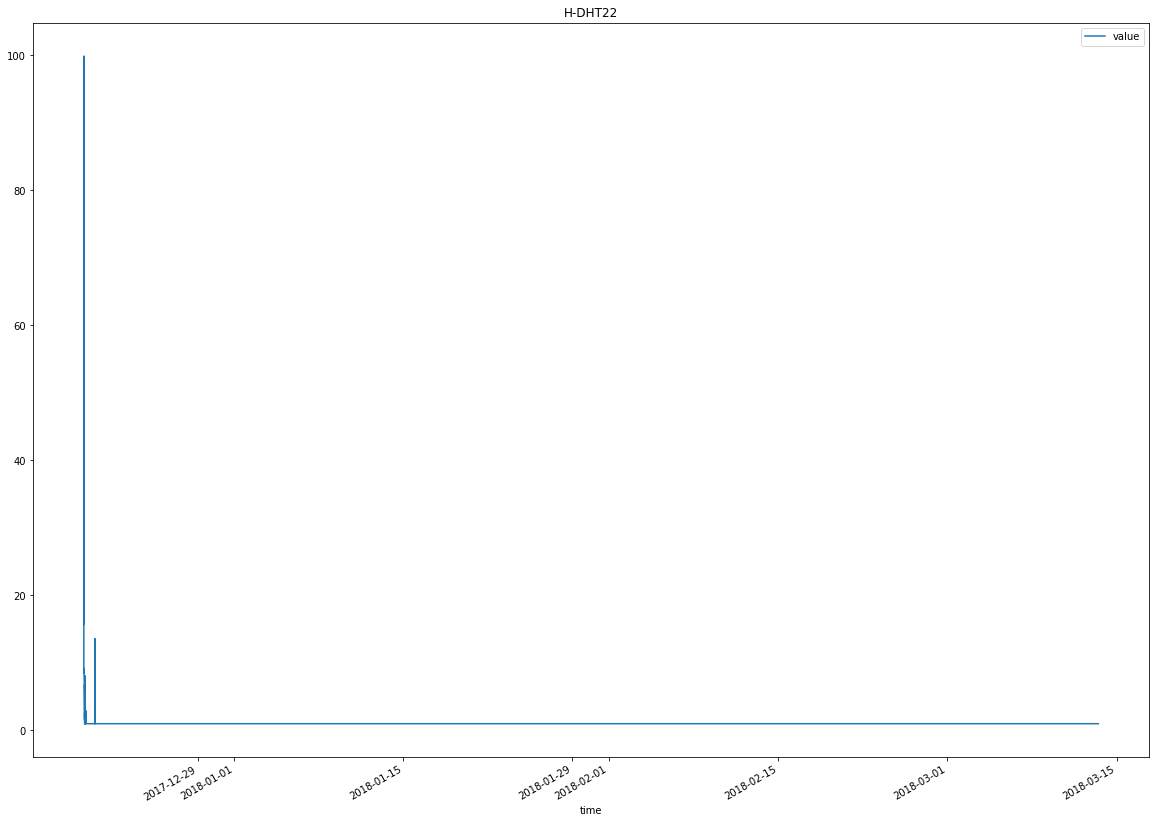

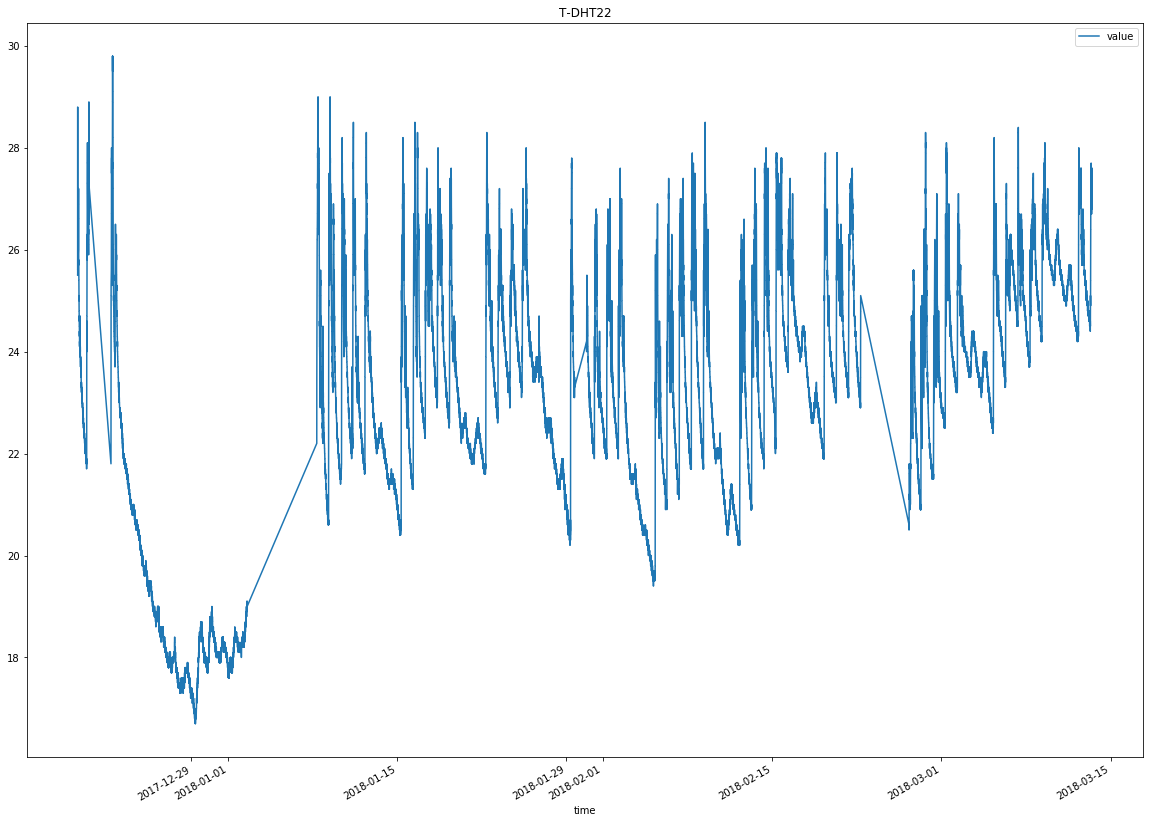

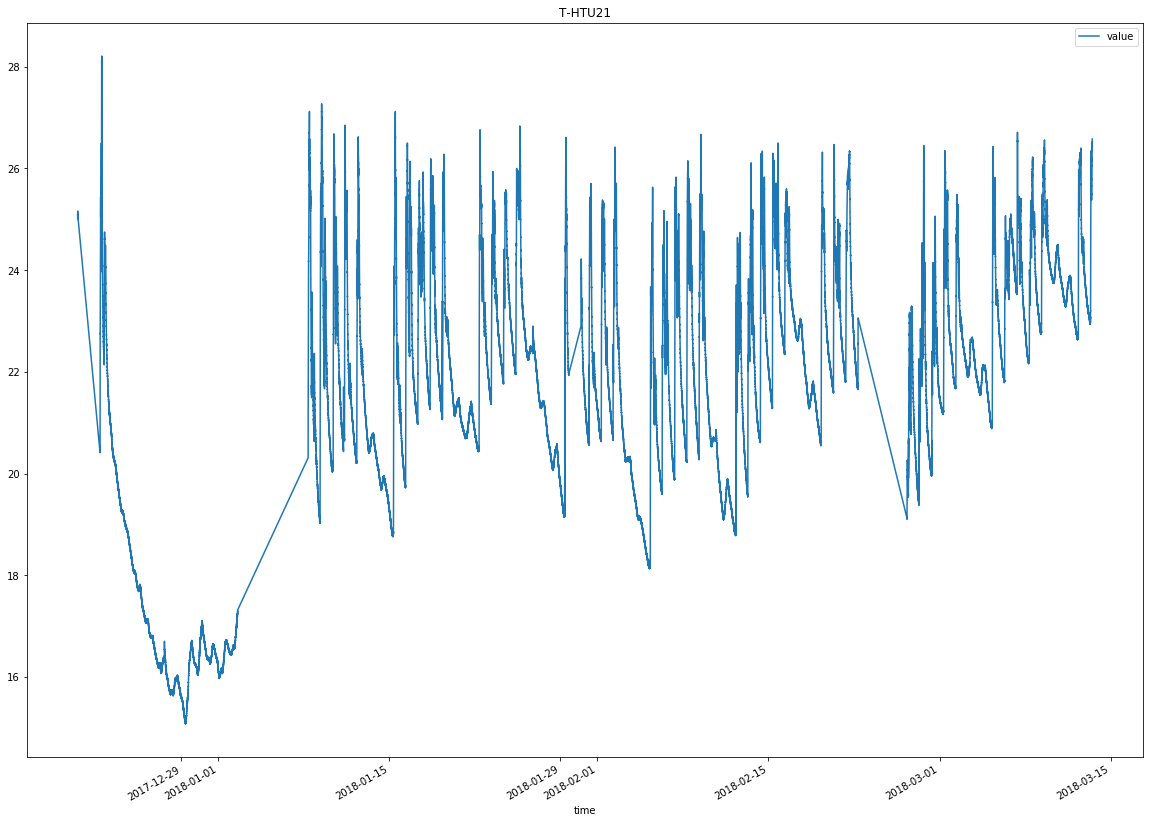

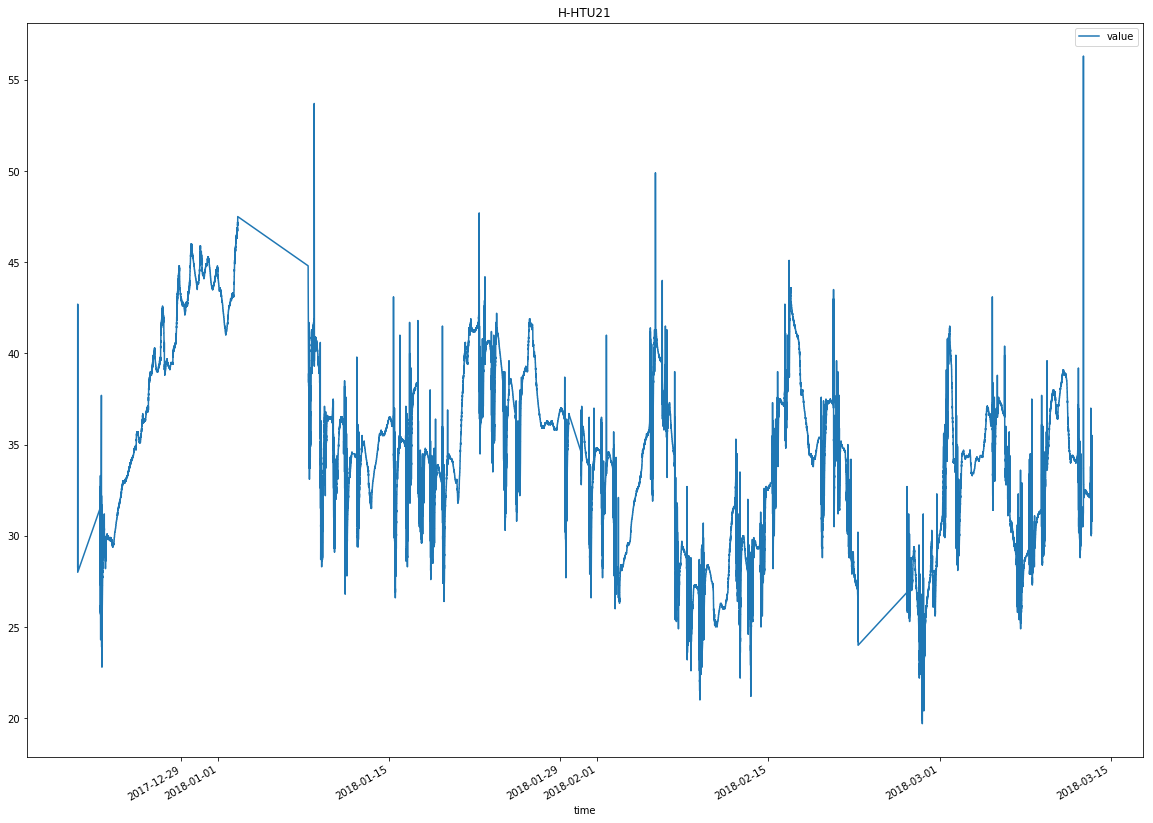

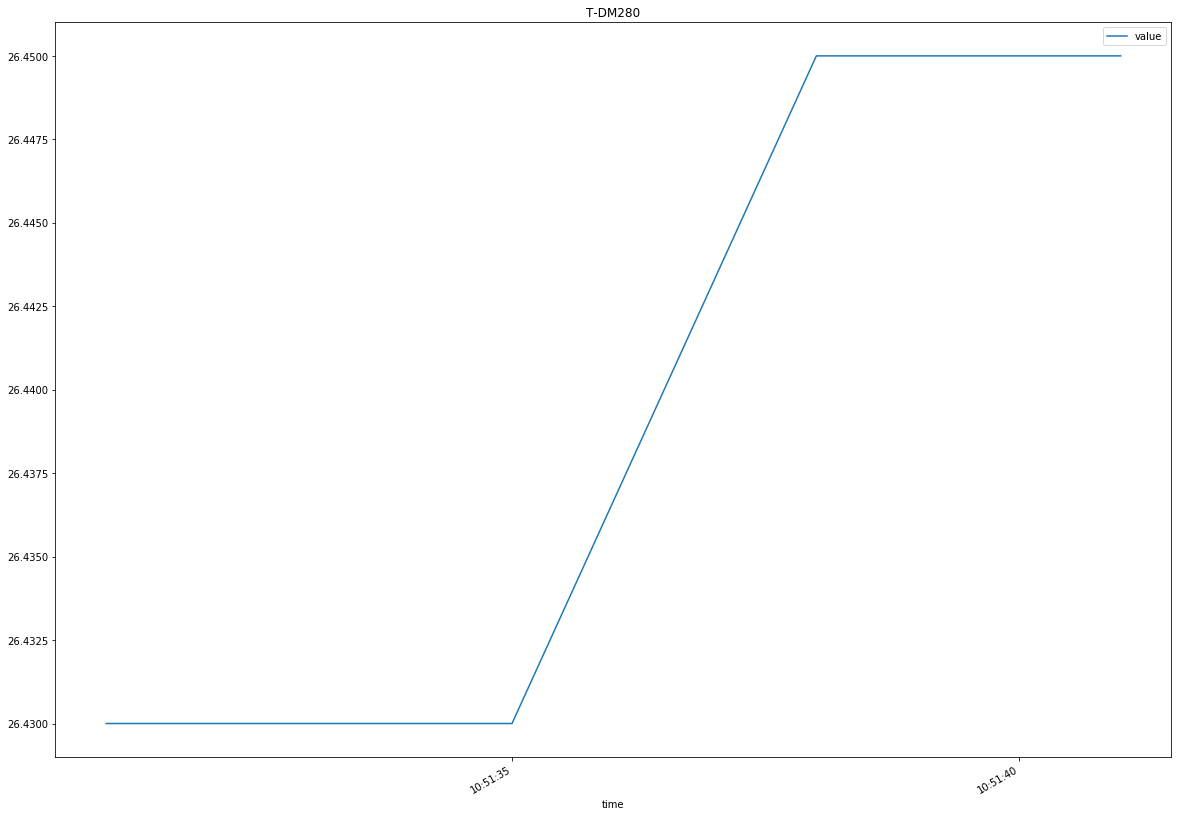

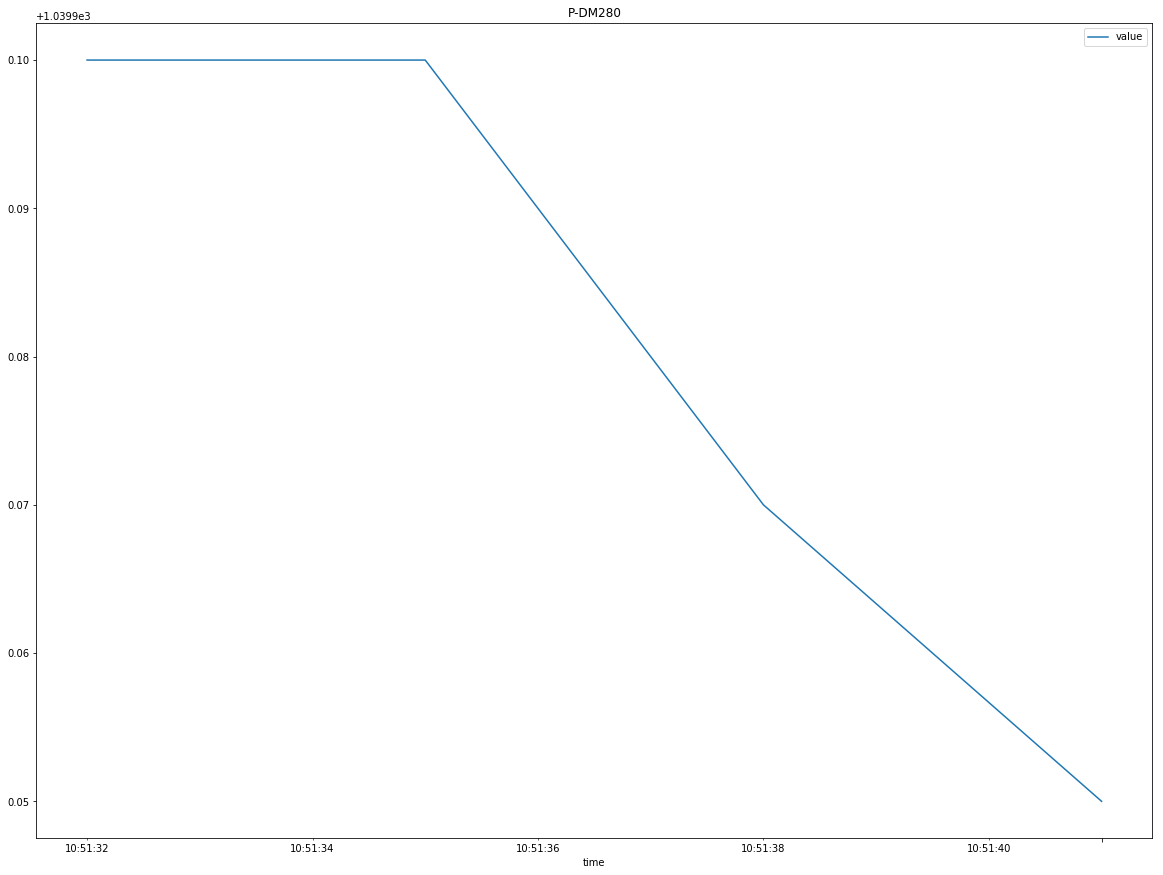

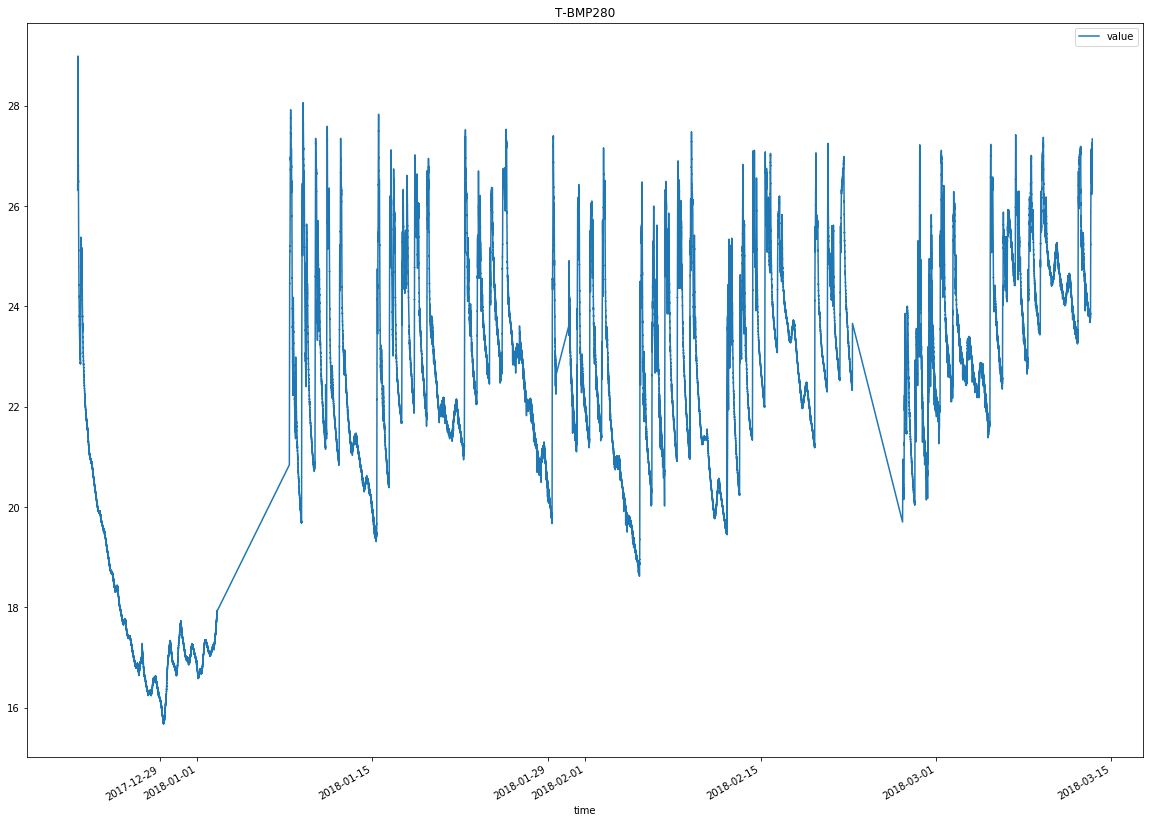

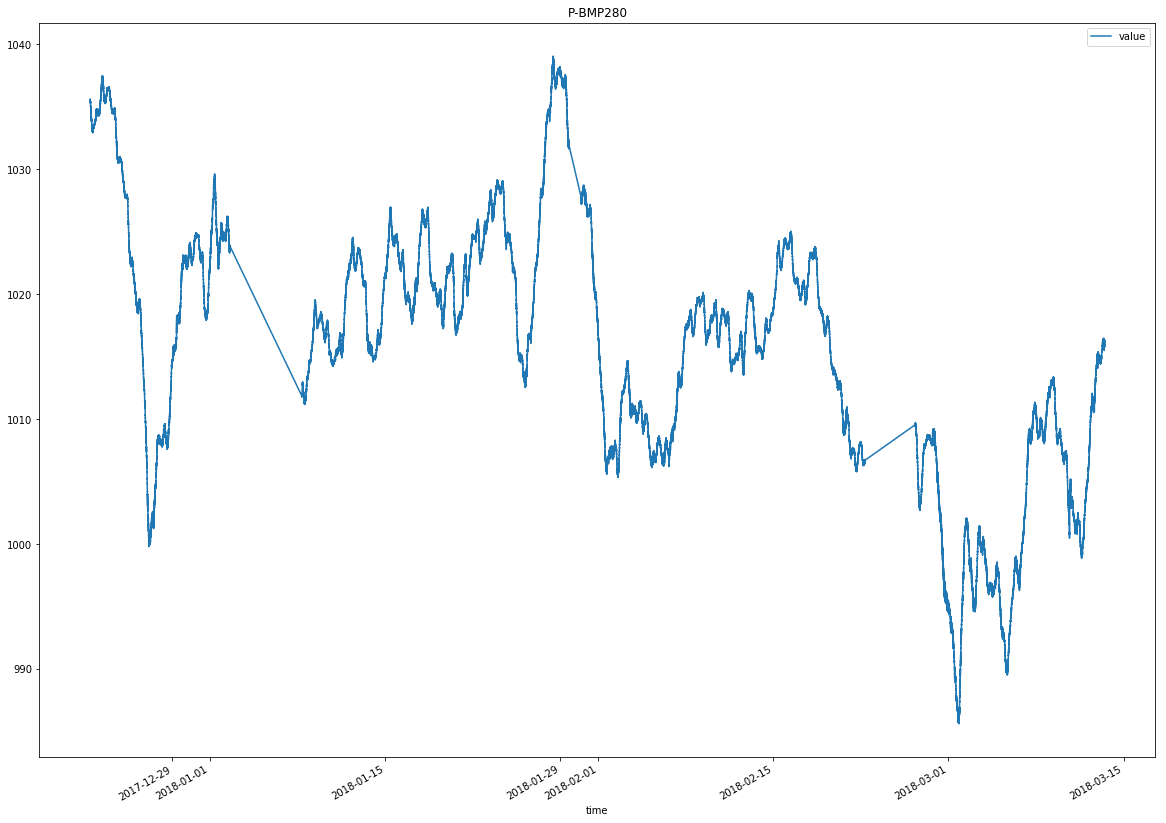

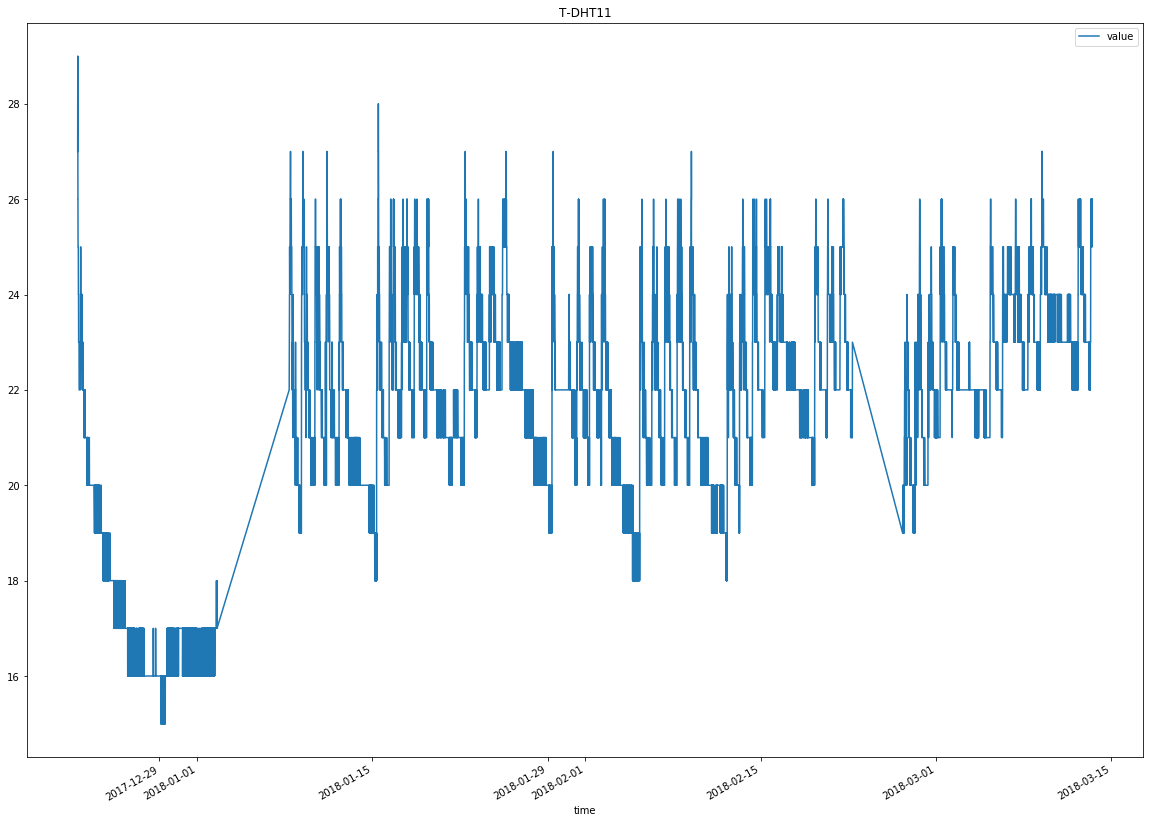

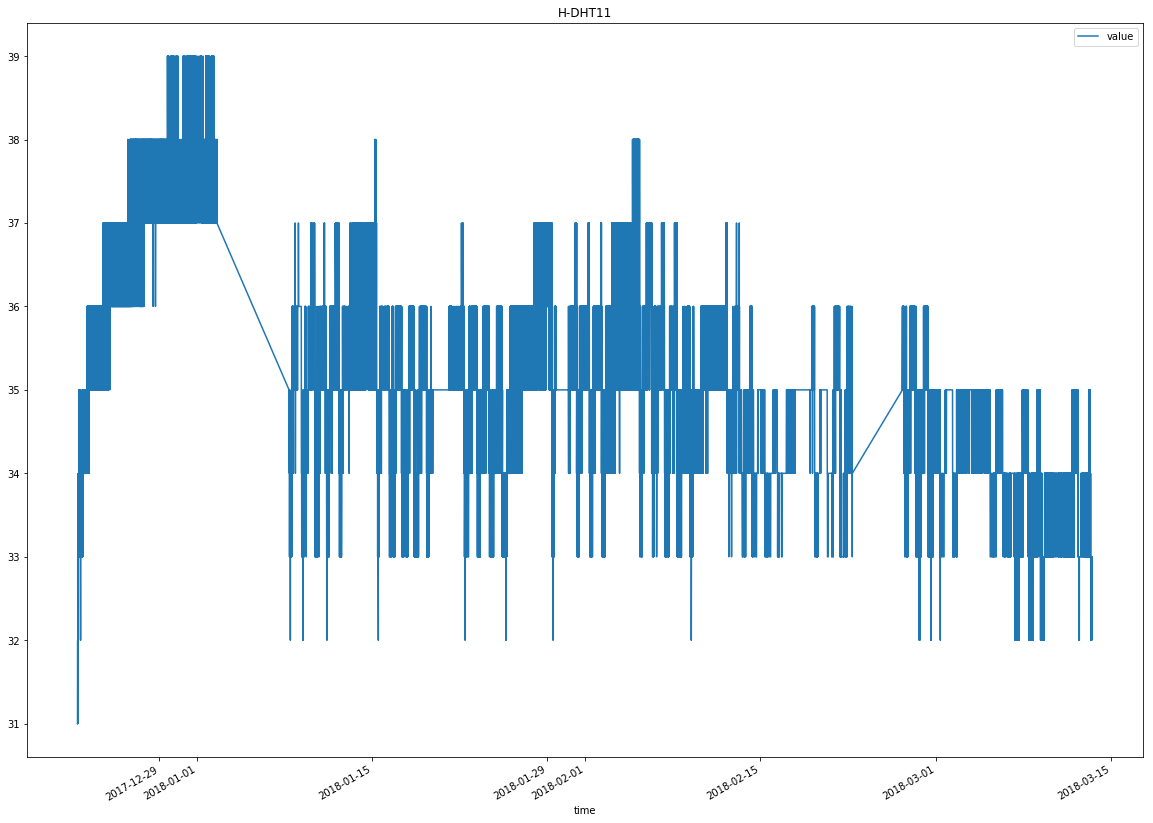

In [25]:
for sensor_type in df.sensor.unique():
    df[df.sensor == sensor_type].plot()
    plt.title(sensor_type)
    plt.show();

We can see two things: There is white noise in some of our sensors and the sensor H-DHT22 has extrange values at the beginning.

In [26]:
df[df.sensor == 'H-DHT22'].describe()

,value
count,1.440160e+06
mean,1.001381e+00
std,1.991973e-01
min,1.000000e+00
25%,1.000000e+00
50%,1.000000e+00
75%,1.000000e+00
max,9.990000e+01


C:\Users\marc.ribalta\AppData\Local\Continuum\anaconda3\envs\SIGNN\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


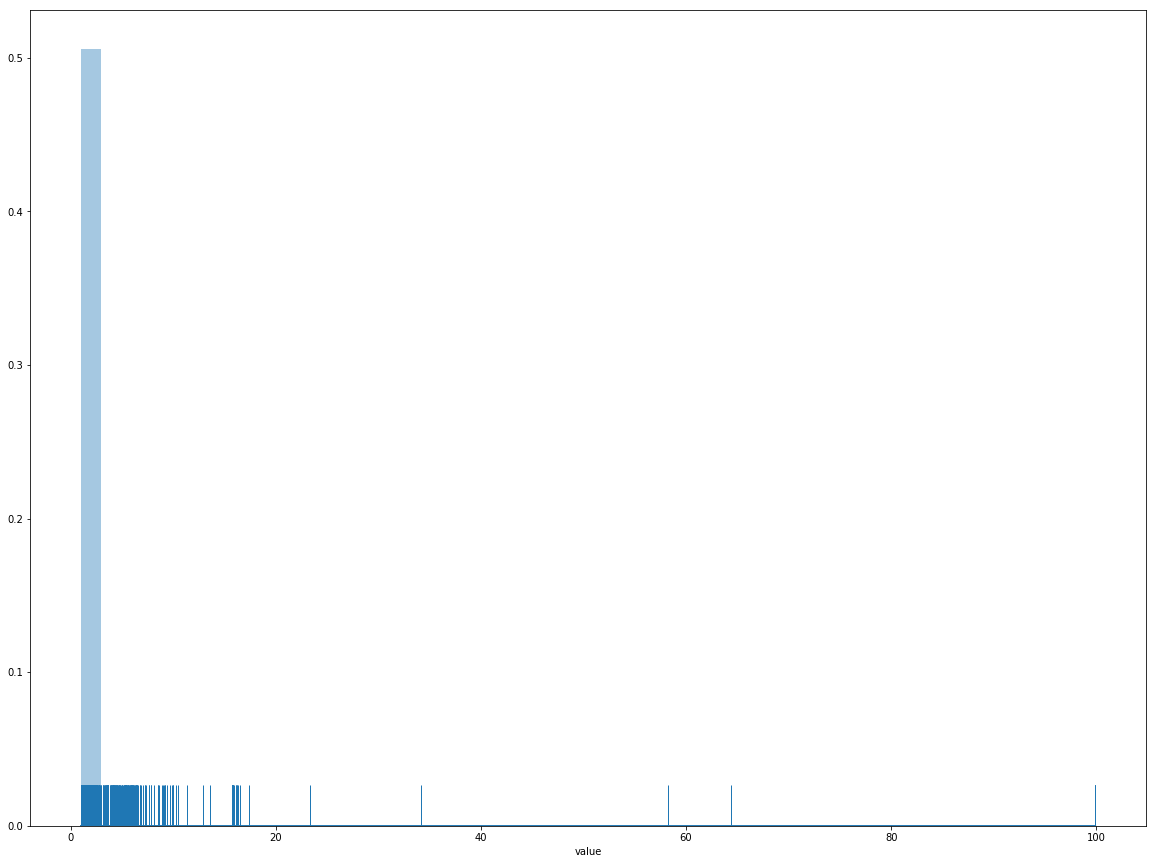

In [15]:
sns.distplot(df[df.sensor == 'H-DHT22'].value, rug=True)

We can see that this sensor contains values over 20, and that those values may be outliers. In this case we are going to convert this values into Nan, and then fill them with an interpolation.

In [34]:
outliers_mask = (df.sensor == 'H-DHT22') & (df.value > 20)
df.loc[outliers_mask, 'value'] = np.nan

In [38]:
df[df.value.isna() == True]

,sensor,value
time,,
2017-12-19T14:09:34Z,H-DHT22,NaN
2017-12-19T14:09:40Z,H-DHT22,NaN
2017-12-19T14:09:47Z,H-DHT22,NaN
2017-12-19T14:09:54Z,H-DHT22,NaN
2017-12-19T14:10:01Z,H-DHT22,NaN
2017-12-19T14:10:07Z,H-DHT22,NaN
2017-12-19T14:10:14Z,H-DHT22,NaN
2017-12-19T14:10:21Z,H-DHT22,NaN


In [39]:
df.value.interpolate(inplace=True)

In [40]:
df[df.value.isna() == True]

,sensor,value
time,,


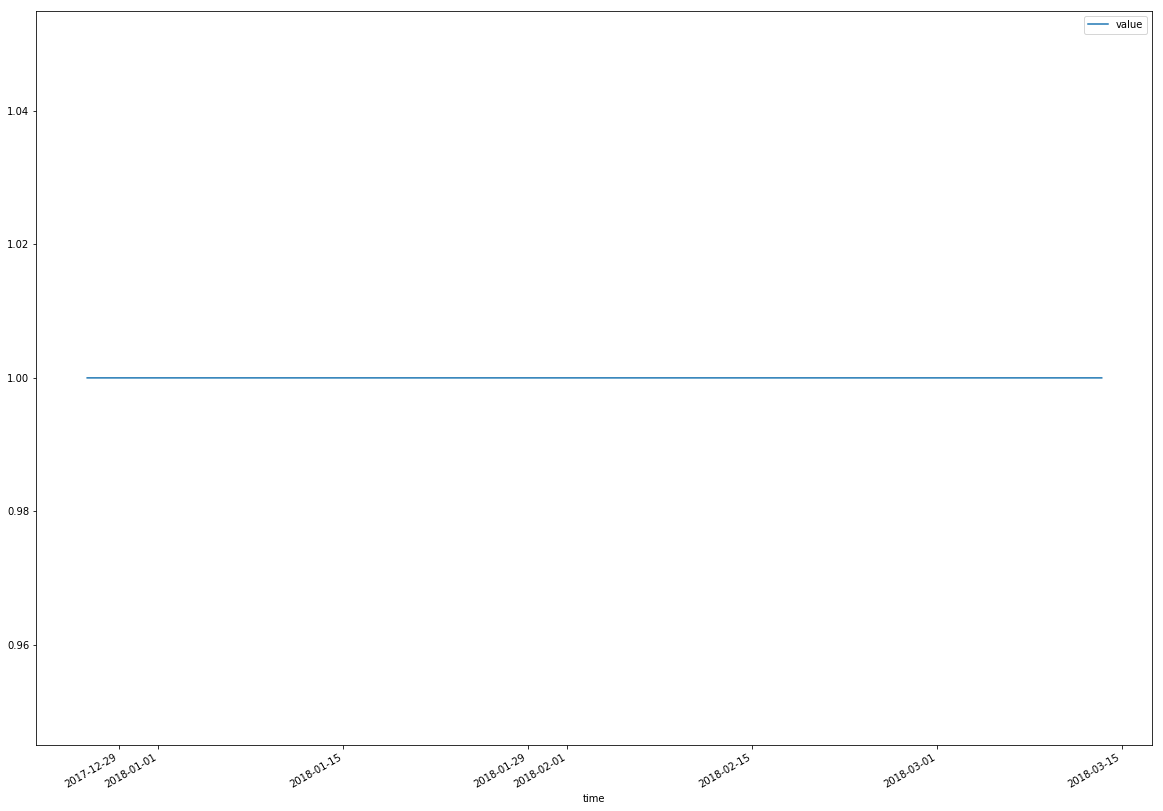

In [46]:
df[df.sensor == 'H-DHT22'][100000:].plot()

As we can see in the plot, this sensor is getting the same value during a lot of time, so the values may not be real. In a real case problem, we should study the domain to see if this value can be real. In this case, we are going to assume that the sensor was not in good state.

In [54]:
df[df.sensor == 'H-DHT22'] = np.nan

df.dropna(inplace=True)

df[df.sensor == 'H-DHT22']

There are two sensors that don't have a lot of values, t-dm280 and p-dm280

In [57]:
df[df.sensor == 'T-DM280']

,sensor,value
time,,
2017-12-22 10:51:31,T-DM280,26.43
2017-12-22 10:51:35,T-DM280,26.43
2017-12-22 10:51:38,T-DM280,26.45
2017-12-22 10:51:41,T-DM280,26.45


In [58]:
df[df.sensor == 'P-DM280']

,sensor,value
time,,
2017-12-22 10:51:32,P-DM280,1040.00
2017-12-22 10:51:35,P-DM280,1040.00
2017-12-22 10:51:38,P-DM280,1039.97
2017-12-22 10:51:41,P-DM280,1039.95


There is no reason to save them, but there is also no reason to delete them. We know there are only 4 rows for each sensor, but they might indicate an event, so saving them it's not a problem.

Finally, we have white noise in some of the sensors that we could remove. To do this we could implement a low-pass filter: The most basic one is a simple moving average, but we could implement an butterworth, chebyshev, etc.

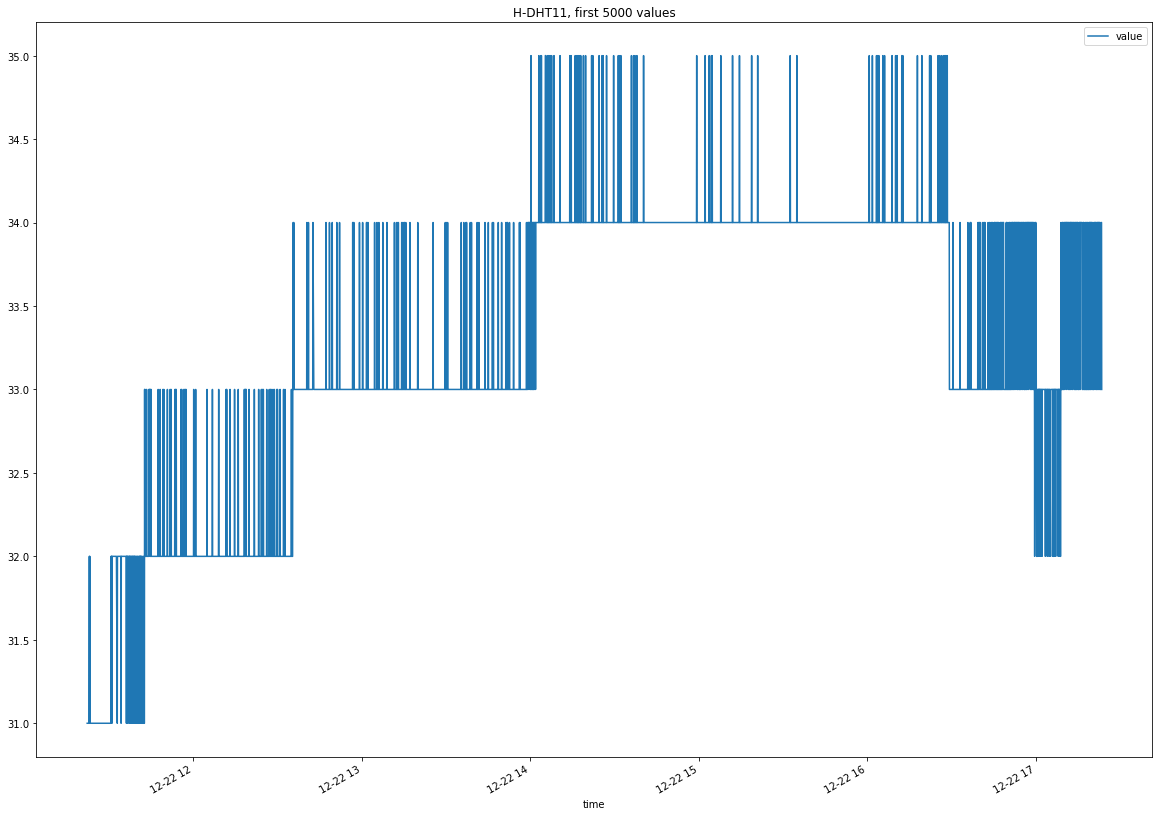

In [66]:
df[df.sensor == 'H-DHT11'][:5000].plot()
plt.title('H-DHT11, first 5000 values');

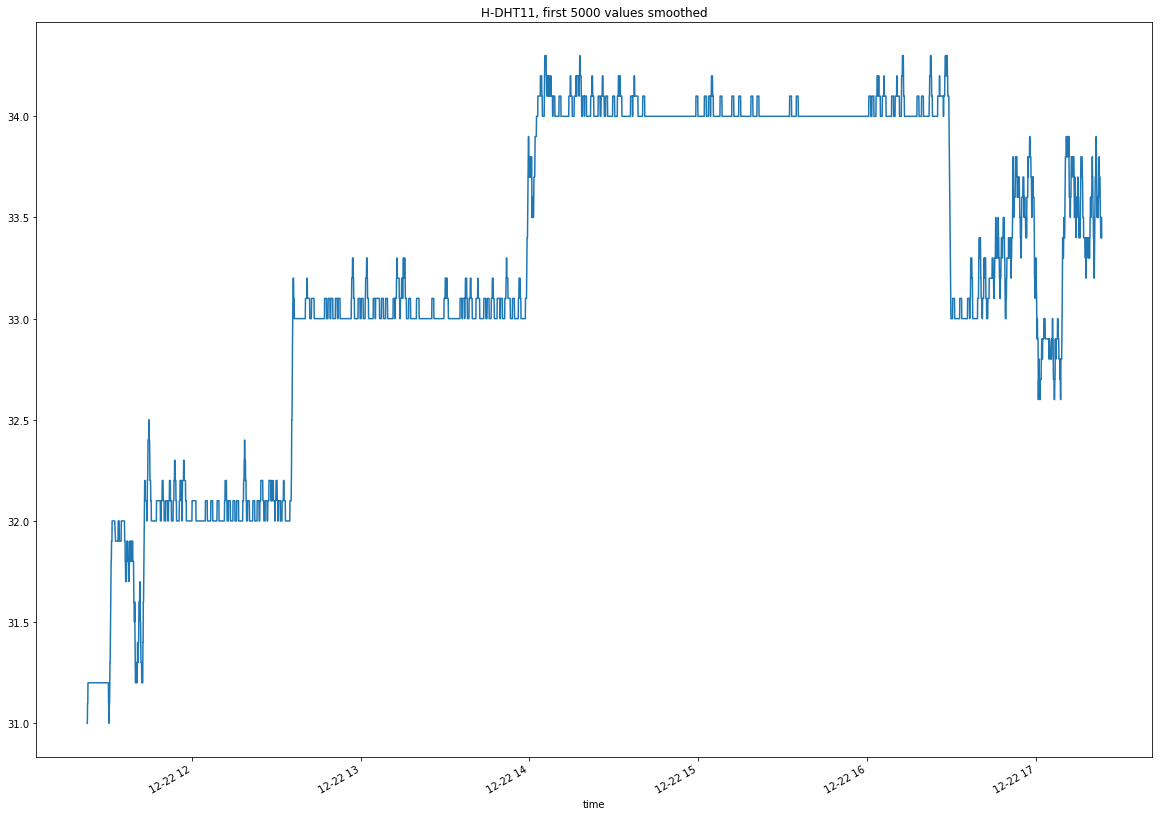

In [67]:
df[df.sensor == 'H-DHT11'][:5000].value.rolling(10).mean().plot()
plt.title('H-DHT11, first 5000 values smoothed');

Let's try a butterworth filter, using the library SciPy

In [92]:
from scipy.signal import butter
from scipy.signal import filtfilt

def low_pass(values):
    b, a = butter(4, 0.12) # Order, freq
    return filtfilt(b, a, values)

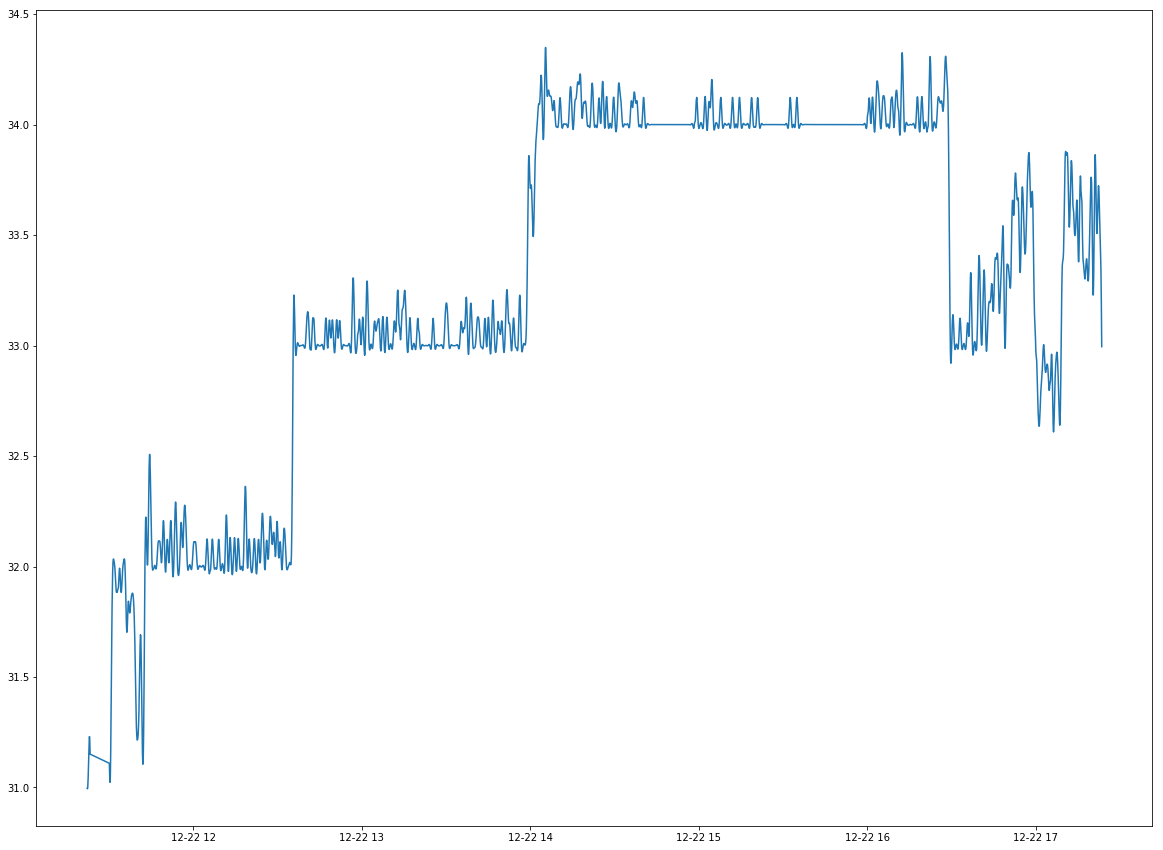

In [93]:
plt.plot(df[df.sensor == 'H-DHT11'][:5000].index, low_pass(df[df.sensor == 'H-DHT11'][:5000].value.values))

Even the low-pass frequency is not adjusted, we can observe good results.